**Author: Fitria Dwi Wulandari (wulan391@sci.ui.ac.id) - September 16, 2021.**

# Exploratory Data Analysis of COVID-19 in West Java

## **COVID-19 Cases in Indonesia**

### Data Loading

#### Accessing covid19.go.id

In [13]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

#### Status Code

In [14]:
print(resp)

<Response [200]>


It indicates that the REST API successfully carried out whatever action the client requested. 

#### Headers

In [15]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Thu, 16 Sep 2021 08:10:02 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Thu, 16 Sep 2021 08:05:05 GMT', 'ETag': 'W/"6142fab1-3539a"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


#### Extracting Response

In [16]:
cov_id_raw  = resp.json()

In [17]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Component of cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Component of cov_id_raw  : dict_keys(['data', 'update']).


### Understanding COVID-19 Cases in Indonesia

In [18]:
# When is the update date for the new cases?
print('Update date of new cases :', cov_id_update['penambahan']['tanggal'])
# What is the number of new recovered cases?
print('Number of new recovered cases :', cov_id_update['penambahan']['jumlah_sembuh'])
# What is the number of new deaths cases?
print('Number of new deaths cases :', cov_id_update['penambahan']['jumlah_meninggal'])
# What is the total number of positive cases?
print('Total number of positive cases :', cov_id_update['total']['jumlah_positif'])
# What is the total number of deaths cases
print('Total number of deaths cases :', cov_id_update['total']['jumlah_meninggal'])

Update date of new cases : 2021-09-15
Number of new recovered cases : 11046
Number of new deaths cases : 267
Total number of positive cases : 4178164
Total number of deaths cases : 139682


## **COVID-19 Cases in West Java**

### Data Loading

In [19]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

### Understanding COVID-19 Cases in West Java

In [20]:
print('Main element names:\n', cov_jabar_raw.keys())
print('\nTotal number of COVID-19 cases in West Java : %d' %cov_jabar_raw['kasus_total'])
print('Percentage of deaths from COVID-19 in West Java : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Percentage of recovery rate from COVID-19 in West Java : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Main element names:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Total number of COVID-19 cases in West Java : 699185
Percentage of deaths from COVID-19 in West Java : 2.072556.2%
Percentage of recovery rate from COVID-19 in West Java : 97.044273.2%


### Data Preprocessing

In [21]:
import numpy as np
import pandas as pd

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

print('Information of data frame:')
cov_jabar.info()
print('\nTop 5 data:\n', cov_jabar.head())

Information of data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       561 non-null    int64
 1   KASUS                         561 non-null    int64
 2   MENINGGAL                     561 non-null    int64
 3   SEMBUH                        561 non-null    int64
 4   DIRAWAT_OR_ISOLASI            561 non-null    int64
 5   AKUMULASI_KASUS               561 non-null    int64
 6   AKUMULASI_SEMBUH              561 non-null    int64
 7   AKUMULASI_MENINGGAL           561 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  561 non-null    int64
dtypes: int64(9)
memory usage: 39.6 KB

Top 5 data:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0               

#### Correcting

Features that require correction are as follows:
1. Delete the `CARE_OR_ISOLATED` column and all columns that contain cumulative values.
2. Change the writing format of all columns to lowercase.
3. Renaming the `case` column to `new_case`.
4. Reformat data type in `date` column using pd.to_datetime.

In [22]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

print('Top 5 data:\n', cov_jabar_tidy.head())

Top 5 data:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


### Visualization

#### **Daily Cases of COVID-19**

**1. Daily Positive Cases of COVID-19 in West Java**

<ipython-input-23-7cd58b59a8fc>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

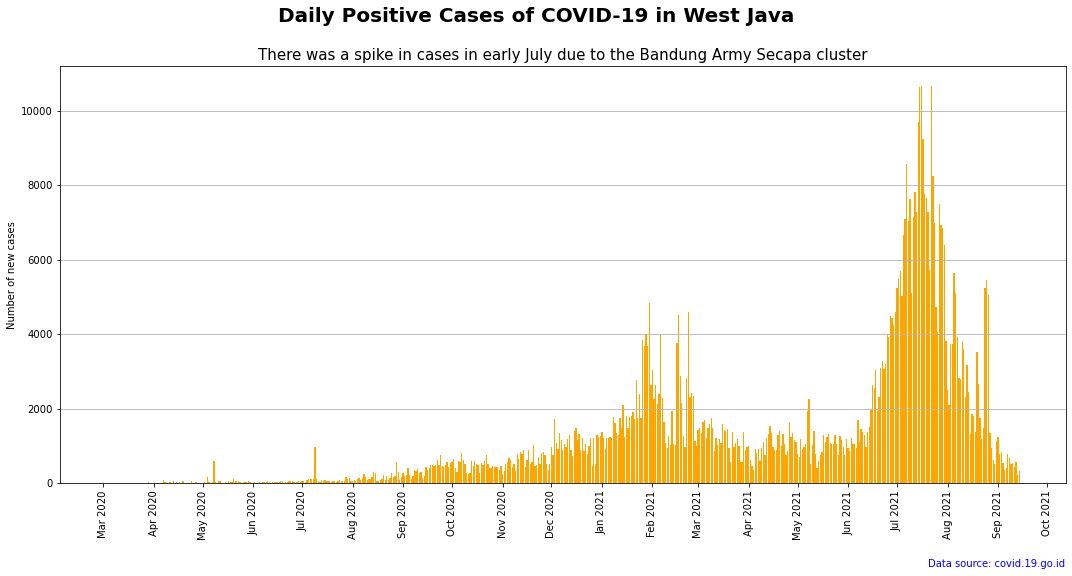

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='orange')
fig.suptitle('Daily Positive Cases of COVID-19 in West Java', 
             y=1.00, fontsize=20, fontweight='bold', ha='center')
ax.set_title('There was a spike in cases in early July due to the Bandung Army Secapa cluster',
             fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Number of new cases')
ax.text(1, -0.2, 'Data source: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

It can be seen that there is a fluctuation in the daily positive cases.

**2. Daily Recovered Cases of COVID-19 in West Java**

<ipython-input-24-3fbf160b06fc>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

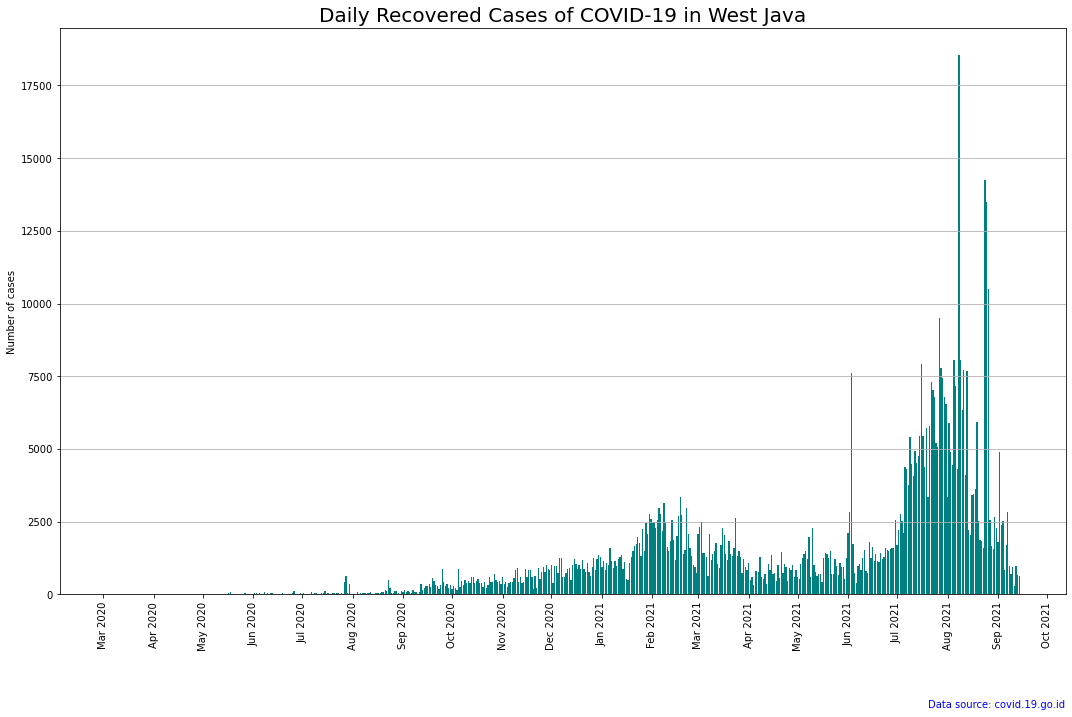

In [24]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='teal')
ax.set_title('Daily Recovered Cases of COVID-19 in West Java',
             fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Number of cases')
ax.text(1, -0.2,'Data source: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3. Daily Deaths Case of COVID-19 in West Java**

<ipython-input-25-219bc370bfb8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

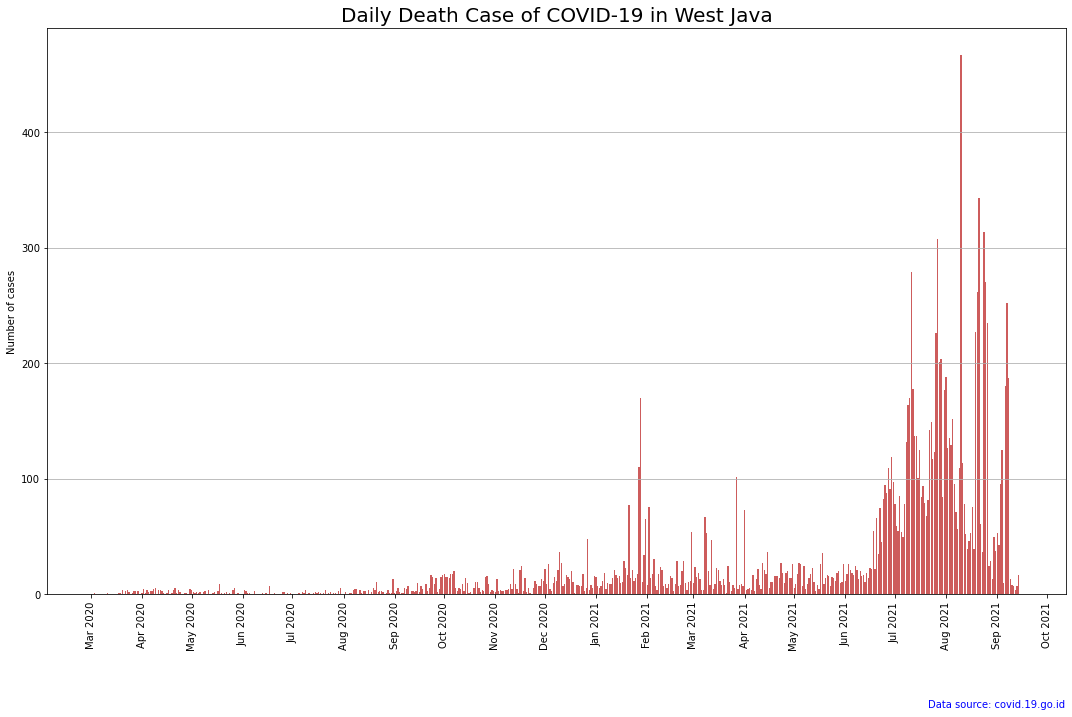

In [25]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='indianred')
ax.set_title('Daily Death Case of COVID-19 in West Java',
             fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Number of cases')
ax.text(1, -0.2,'Data source: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### **Weekly Cases of COVID-19**

In [26]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                      .resample('W')
                      .sum()
                      .reset_index()
                      .rename(columns={'kasus_baru': 'jumlah'})
)
                 
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Infomation of data frame:')
cov_jabar_pekanan.info()
print('\nTop 5 data:\n', cov_jabar_pekanan.head())

Infomation of data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     81 non-null     int64
 1   pekan_ke  81 non-null     int64
 2   jumlah    81 non-null     int64
dtypes: int64(3)
memory usage: 2.0 KB

Top 5 data:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


**Is This Week Better than Last Week?**

In [27]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Top 10 data:\n', cov_jabar_pekanan.head(10))

Top 10 data:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


<ipython-input-27-dc0fba015be4>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)


**How are Cases Progressing in a Span of Weeks?**

<Figure size 432x288 with 0 Axes>

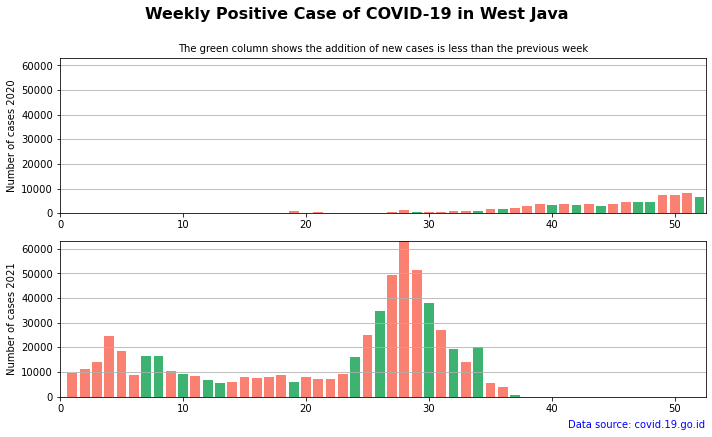

In [28]:
plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
                         figsize=(10, 3*jml_tahun_terjadi_covid19))

fig.suptitle('Weekly Positive Case of COVID-19 in West Java',
            y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]],
            x='pekan_ke', height='jumlah',
            color=['mediumseagreen' if x is True else 'salmon'
            for x in cov_jabar_pekanan['lebih_baik']])
    if i == 0:
        ax.set_title('The green column shows the addition of new cases is less than the previous week',
                    fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Data source: covid.19.go.id', color='blue',
                ha='right',transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0,max(cov_jabar_pekanan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Number of cases %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

It can be seen that some have finally recovered, but not a few have died from COVID-19. Meanwhile, the addition of new cases continues to occur in the society.

**Until Now, How Many Active Cases?**

- Active cases means being in treatment or isolation.
- The number of active cases can be calculated by subtracting the number of accumulated positives by the number of accumulated recoveries and the number of accumulated deaths.

In [29]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
556 2021-09-10             7733            675467                14444
557 2021-09-11             7876            675763                14451
558 2021-09-12             7460            676742                14455
559 2021-09-13             6983            677422                14462
560 2021-09-14             6660            678046                14479


<ipython-input-30-163b12ba5f83>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

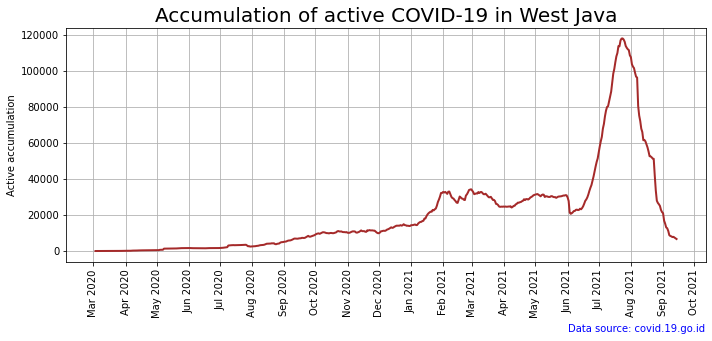

In [30]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2, color='brown')

ax.set_title('Accumulation of active COVID-19 in West Java',
             fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Active accumulation')
ax.text(1, -0.3, 'Data source: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

#### **Comparative Graph Between the Accumulation of Active Cases, Recovered Cases, and Death Cases**

<Figure size 432x288 with 0 Axes>

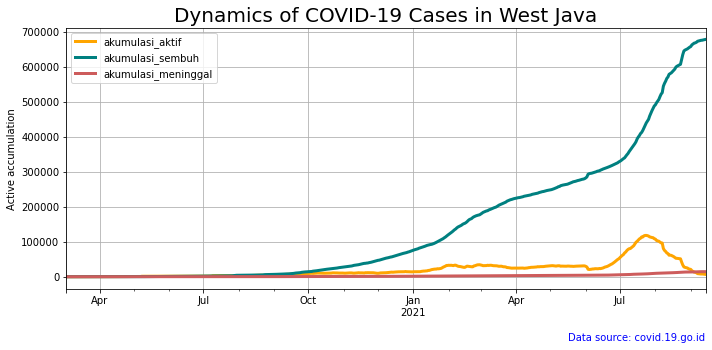

In [31]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
                            color=['orange', 'teal', 'indianred'])

ax.set_title('Dynamics of COVID-19 Cases in West Java',
        fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Active accumulation')
ax.text(1, -0.2, 'Data source: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()